Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

In [1]:
!wget https://www.sqlite.org/src/tarball/sqlite.tar.gz?r=release -O sqlite.tar.gz
!tar xzf sqlite.tar.gz
%cd sqlite/
!./configure
!make sqlite3.c
%cd /content
!npx degit coleifer/pysqlite3 -f
!cp sqlite/sqlite3.[ch] .
!python setup.py build_static build
!cp build/lib.linux-x86_64-3.6/pysqlite3/_sqlite3.cpython-36m-x86_64-linux-gnu.so \
    /usr/lib/python3.6/lib-dynload/_sqlite3.cpython-36m-x86_64-linux-gnu.so
# then MENU: Runtime > Restart runtime ...

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


[WinError 2] Не удается найти указанный файл: 'sqlite/'
C:\Users\timur\Я.Практикум\Проекты\Data Science\Отредактировать\14.SQL


tar: Error opening archive: Failed to open 'sqlite.tar.gz'
"." ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


[WinError 2] Не удается найти указанный файл: '/content'
C:\Users\timur\Я.Практикум\Проекты\Data Science\Отредактировать\14.SQL


"make" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"npx" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"cp" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
python: can't open file 'setup.py': [Errno 2] No such file or directory
"cp" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [2]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

In [3]:
sqlite3.sqlite_version

'3.32.3'

# Импортировать файлы

In [4]:
try:
    folder = 'C:/Users/timur/Я.Практикум/Проекты/Data Science/Отредактировать/14.SQL/'
    query_1 = pd.read_csv(folder + 'query_1.csv')
    query_3 = pd.read_csv(folder + 'query_3.csv')

except:
    
    try:
        folder = '/content/drive/MyDrive/Colab Notebooks/14.SQL/'
        query_1 = pd.read_csv(folder + 'query_1.csv')
        query_3 = pd.read_csv(folder + 'query_3.csv')
    
    except:
  
        query_1 = pd.read_csv('/datasets/query_1.csv')
        query_3 = pd.read_csv('/datasets/query_3.csv')

# Изучить данные в них

In [5]:
query_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [6]:
query_1['flights_amount'].describe()

count       8.000000
mean     2035.625000
std      1965.203947
min       300.000000
25%       605.250000
50%       795.000000
75%      4250.250000
max      4557.000000
Name: flights_amount, dtype: float64

In [7]:
query_3

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [8]:
query_3['average_flights'].describe()

count    101.000000
mean       5.494189
std       13.119790
min        1.000000
25%        2.000000
50%        3.000000
75%        5.870968
max      129.774194
Name: average_flights, dtype: float64

In [9]:
con = sqlite3.connect('db')
cur = con.cursor()

In [10]:
query_1.to_sql('query_1',con,if_exists='replace',index=False)

In [11]:
sql_query1 = '''select * from query_1 t'''

In [12]:
def select(sql):
    return pd.read_sql(sql,con)

In [13]:
select(sql_query1)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [14]:
query_3.to_sql('query_3',con,if_exists='replace',index=False)

In [15]:
sql_query3 = '''select * from query_3'''

In [16]:
select(sql_query3)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


# Проверить типы данных на корректность

In [17]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [18]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


# Выбрать топ-10 городов по количеству рейсов

In [79]:
sql_top10 = '''select * from query_3 t order by average_flights desc limit 10'''

In [80]:
select(sql_top10)

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


# Построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;

## Модели самолётов и количество рейсов

In [21]:
select(sql_query1)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


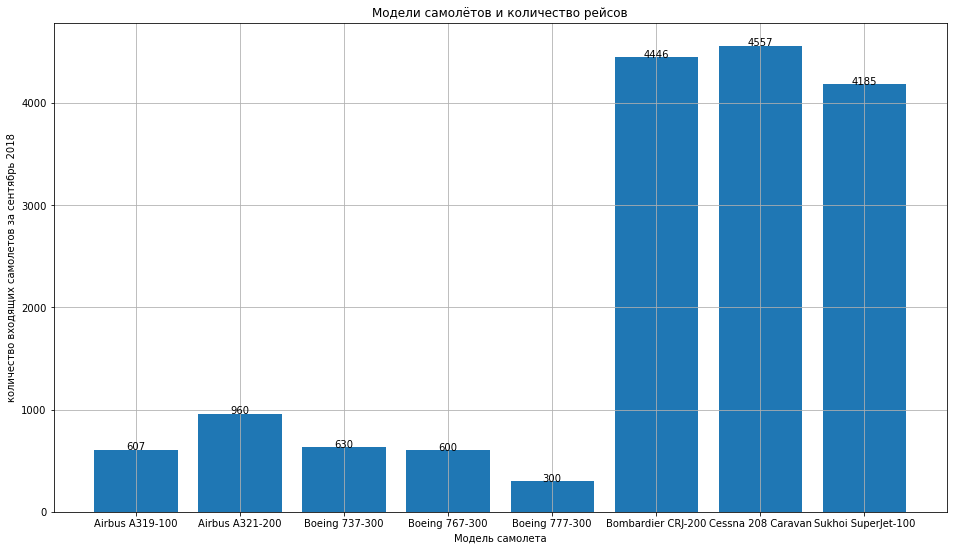

In [70]:
x = select(sql_query1)['model']
y = select(sql_query1)['flights_amount']

fig, ax = plt.subplots()

bars = ax.bar(x, y)
ax.grid()
fig.set_figwidth(16)
fig.set_figheight(9)
ax.set_xlabel('Модель самолета')
ax.set_ylabel('количество входящих самолетов за сентябрь 2018')
ax.set_title('Модели самолётов и количество рейсов')

for x, y in zip(x, y):
    plt.text(x, y, str(y), horizontalalignment="center")

Видим явное разделение на две категории по количеству полетов в месяц. В первой самолеты с числом полетов до 1000, во второй от 4000. И воздушная яма посередине...

Чтобы понять, с чем это связано, приведем краткую сводку информации по каждой модели самолетов.
- Airbus A319-100 входит в семейство авиалайнеров Airbus A320 малой и средней дальности, узкофюзеляжных коммерческих пассажирских двухмоторных реактивных лайнеров производства Airbus.
- Airbus A321-200 лайнеры A321, введённые в эксплуатацию в начале 1994 года, являются самыми крупными в семействе A320. Типовая компоновка A321 предусматривает размещение 170 пассажиров в двух классах или до 220 пассажиров в одном классе для чартерных и бюджетных перевозок, при этом дальность полёта составляет до 5600 км. 
- Boeing 737-300 стал базовой моделью так называемой классической серии семейства самолетов Боинг-737 (Boeing 737 Classic), наряду с моделями 737-400 (версия с удлиненным фюзеляжем) и 737-500 (с укороченным фюзеляжем и повышенной дальностью). Производство Boeing 737-300 продолжалось с 1984 по 1999 гг. За этот период было построено 1113 самолетов. С 2005 г. действует программа переоборудования самолетов раннего выпуска в грузовые варианты - Boeing 737-300SF.
-  Boeing 777–300 - крупнейший в мире двухмоторный турбовентиляторный пассажирский лайнер, создан для дальнемагистральных рейсов (дальность полета — до 11000 км).
- Bombardier CRJ100 и CRJ200 — семейство региональных самолётов, производимых канадской компанией Bombardier и основанных на бизнес-джете Canadair Challenger.
- Cessna 208 Caravan - американский лёгкий одномоторный турбовинтовой самолёт общего назначения с неубирающимся шасси. Выпускается компанией «Сессна» с 1984 года в различных модификациях (пассажирские, грузопассажирские, грузовые, самолёт-амфибия). Используется на авиалиниях малой протяжённости. 
- Sukhoi SuperJet-100 - российский ближнемагистральный узкофюзеляжный пассажирский самолёт, предназначенный для перевозки от 87 до 108 пассажиров на дальность 3050 или 4600 км.

Резюмируя, можно сказать, что в первую группу самолетов, с малым количеством перелетов, попали **авиалайнеры** - самолеты, способные преодолевать средние и дальние дистанции, и вмещающие большее количество пассажиров, по сравнению со второй группой. <br/>
Во второй группе, с большим количеством перелетов, попали **ближнемагистральные маловместимые самолеты**. <br/>
Логично, что для межрегиональных перелетов чаще используются небольшие самолеты.
В рамках одной страны необходимо обеспечить высокую частоту перелетов, чтобы авиаперелеты оставались конкурентоспособными, по сравнению с другими видами транспорта. 

## Города и количество рейсов

In [24]:
select(sql_query3)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


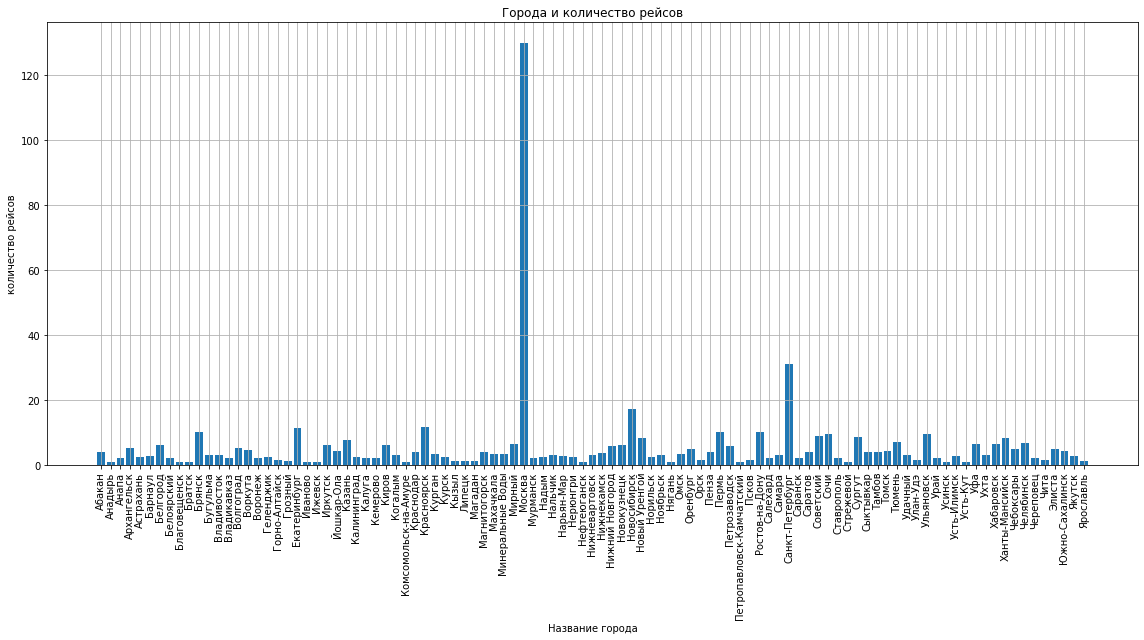

In [69]:
x = select(sql_query3)['city']
y = select(sql_query3)['average_flights']

plt.figure(figsize=(16, 9))
plt.bar(x, y)
plt.grid(zorder=0)
plt.xticks(rotation=90)
plt.title('Города и количество рейсов')
plt.xlabel('Название города')
plt.ylabel('количество рейсов')
plt.tight_layout()

Большинство городов принимают очень мало входящих рейсов в день.



## Топ-10 городов и количество рейсов

In [27]:
select(sql_top10)

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


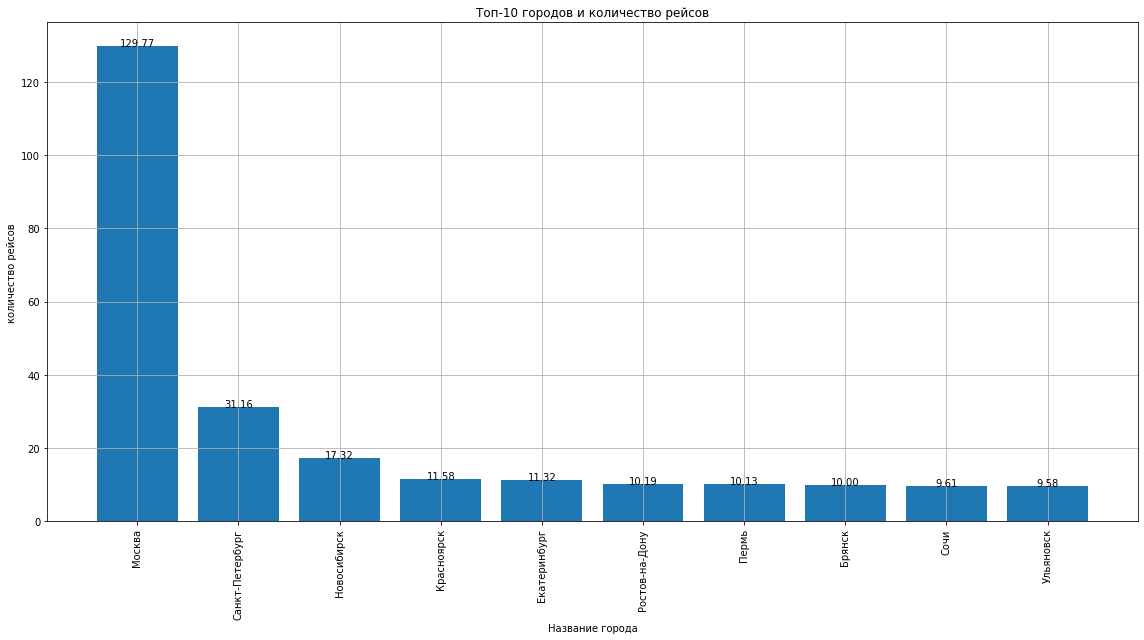

In [68]:
x = select(sql_top10)['city']
y = select(sql_top10)['average_flights']

plt.figure(figsize=(16, 9))

plt.bar(x, y)
plt.grid(zorder=0)
plt.xticks(rotation=90)
plt.tight_layout()

for x, y in zip(x, y):
    plt.text(x, y,  '{:.2f}'.format(y), horizontalalignment="center")
    
plt.title('Топ-10 городов и количество рейсов')
plt.xlabel('Название города')
plt.ylabel('количество рейсов')
plt.tight_layout()

Из графика видно, что в большинство городов в среднем менее 10 рейсов прибывали в день в сентябре 2018ого, даже с учетом выборки топ-10 по количеству рейсов.<br/>
Особняком стоит столица, где среднее количество прибывающих самолетов около 130. В разрезе данных, статистику по Москве можно признать выбросом.

# Общий вывод
По итогу рыботы можем сделать следующие выводы:
- в региональных перелетах чаще используются ближнемагистральные маловместимые самолеты;
- большинство городов принимают очень мало входящих рейсов в день. 50% городов из выборки принимают до 3х самолетов в сутки; 
- количество перелетов в Москву существенно выше(на порядок, а иногда и на два), по сравнению с остальным городами из выборки;
- на втором месте по количеству перелетов занимает Санкт-Петербург. Перелетов в Санкт-Петербург в четыре раза меньше, чем в Москву;
- в топ-10 городов не попала всеми любимая Казань:(
- в топ-10 попали только административные центры, что не удивительно;